# Метод Нестерова и обыкновенные дифференциальные уравнения

По материалам статьи [[W.Su, S. Boyd, E.Candes 2015]](https://arxiv.org/pdf/1503.01243.pdf)

## Постановка задачи

$$
\min_{x \in \mathbb{R}^n} f(x)
$$
- $f$ - непрерывная и дифференцируемая
- ограничений на $x$ нет
- для решения задачи можно использовать только значение функции и её градиент

## И снова градиентный спуск...

$$
x_{k+1} = x_{k} - s f'(x_k)
$$

**Теорема.** 

Пусть 

- $f(x)$ дифференцируема на $\mathbb{R}^n$, 
- градиент $f(x)$ удовлетворяет условию Липшица с константой $L$
- $f(x)$ ограничена снизу
- $s = \mathrm{const}$ и $0 < s < \frac{2}{L}$

Тогда для градиентного метода выполнено:
$$
\lim\limits_{k \to \infty} f'(x_k) = 0,
$$
а функция монотонно убывает $f(x_{k+1}) < f(x_k)$.

## Интерпретация градиентного спуска 

Рассмотрим обыкновенное диференциальное уравнение вида:
$$
\frac{dx}{dt} = -f'(x(t)) \quad x(0) = x_0
$$
и дискретизуем его на равномерной сетке с шагом $\alpha$:
$$
\frac{x_{k+1} - x_k}{s} = -f'(x_k),
$$
где $x_k \equiv x(t_k)$ и $s = t_{k+1} - t_k$ - шаг сетки.

Отсюда получаем выражение для $x_{k+1}$
$$
x_{k+1} = x_k - s f'(x_k),
$$
которое в точности совпадает с выраением для градиентного спуска.

Такая схема называется явной или прямой схемой Эйлера.

**Вопрос:** какая схема называется неявной или обратной?

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)
import seaborn as sns
sns.set_context("talk")
figsize=(8, 6)
fontsize = 18

alpha = 10
def gradf(t):
    return alpha*t

x0 = 1
a = 0
b = 1
h = 1e-2
N = int((b - a) / h)
x = [x0]
for i in range(N):
    x.append(x[i] - h * gradf(x[i]))

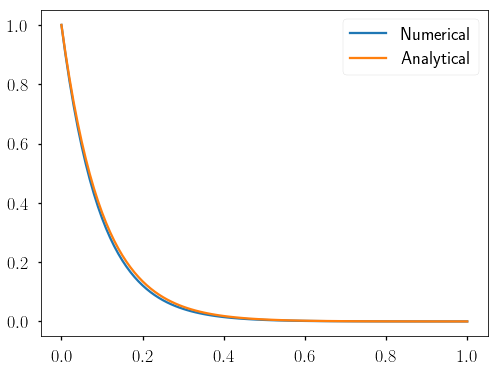

In [2]:
t = np.linspace(a, b, N+1, endpoint=True)
plt.figure(figsize=figsize)
plt.plot(t, x, label="Numerical")
plt.plot(t, x0 * np.exp(-alpha*t), label="Analytical")
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)

## Концепция нижних оценок скоростей сходимости

- Нижние оценки для некоторого класса задач и методов их решению имеют вид
$$
f(x_k) - f^* \geq O(h(k, \ldots)),
$$
то есть показывают какую максимальную скорость сходимости по функционалу может дать класс методов на выбранном классе задач

- Теория нижних оценок для большинства классов задач оптимизации разработана в книге [[Немировский, Юдин 1979]](http://www.twirpx.com/file/451392/)

### Класс задач оптимизации

- Оценивать метод по тому, как он решает *конкретную* задачу бессмысленно, так как он может быть идеальным для единственной задачи и бесполезным для всех остальных
- Введём некоторый *класс* задач $P$, то есть множество задач, обладающих общим свойством
- Например, задачи безусловной оптимизации с сильно выпуклыми целевыми функциями

### Точность решения задачи

- Решение любой задачи является неточным
- Критерий остановки итерационного процесса $S_{\varepsilon}$
- Например, незначительное изменение функции, аргумента; малая норма градиента

### Нижняя оценка скорости сходимости

- Используется модель чёрного ящика
- Оценка верна для **всех** итерационных методов указанного класса на выбранном классе задач 
- Для получения нижних оценок часто используется сопротивляющийся оракул

### Схема получения нижней оценки скорости сходимости

- Фиксириуется класс задач $P$
- Выбирается метод $M$
- Из $P$ определяется наиболее трудная задача $T$ для метода $M$
- Сложность решения $T$ методом $P$ определяет нижнюю оценку для метода $M$ на классе задач $P$

### Нижняя оценка скорости сходимости для методов первого порядка
Рассмотрим методы первого порядка для диференцируемых функций, такие что 
$$
x_{k+1} = \mathrm{Span}(f'(x_k), \ldots, f'(x_1))
$$
- **Теорема.** Существует выпуклая функция с $L$-липшицевым градиентом, такая что для любого метода первого порядка выполнено
$$
f(x_k) - f^* \geq \frac{3L}{32} \frac{\| x_0 - x^*\|^2}{(k+1)^2}
$$
- **Теорема.** Существует функция с $L$-липшицевым градиентом и $l$-сильно выпуклая, такая что для любого метода первого порядка выполнено
$$
f(x_k) - f^* \geq \frac{l}{2} \left( \frac{\sqrt{\kappa} - 1}{\sqrt{\kappa} + 1}\right)^{2k} \| x_0 - x^*\|^2,
$$
где $\kappa = \frac{L}{l}$ - оценка числа обусловленности гессиана.

## Оценка сходимости для градиентного спуска

- **Теорема.** Пусть $f$ выпуклая с $L$-липшицевым градиентом. Тогда для $s = \frac{1}{L}$ градиентный спуск сходится как
$$
f(x_k) - f^* \leq  \frac{2L \| x^* - x_0\|^2}{k}
$$

- **Теорема.** Пусть $f$ c $L$-дипшицевым градиентом и $l$-сильно выпукла. Тогда для градиентного спуска с $s = \dfrac{2}{l + L}$ выполнено:
$$
f(x_k) - f^* \leq \dfrac{L}{2} \left( \dfrac{\kappa - 1}{\kappa + 1} \right)^{2k} \| x_0 - x^*\|^2_2,
$$
где $\kappa = \frac{L}{l}$ - оценка сверху числа обусловленности гессиана

## Оптимальный метод Нестерова

- $x_0 = y_0$
- $s \leq \frac{1}{L}$, где $L$ константа Липшица для градиента
- 
$$
\begin{align*}
& x_k = y_{k-1} - sf'(y_{k-1})\\
& y_k = x_k + \frac{k-1}{k+2}(x_k - x_{k-1})
\end{align*}
$$

- Сходимость для выпуклой функции с $L$-липшицевым градиентом
$$
f(x_k) - f^* \leq O\left(\frac{\| x_k - x_0\|^2}{sk^2}\right)
$$

- Сходимость для $l$-сильно выпуклой функции с $L$-липшицевым градиентом
$$
f(x_k) - f^* \leq O\left(\left( \frac{\sqrt{\kappa} - 1}{\sqrt{\kappa} + 1}\right)^{2k}\right)
$$

## Интерпретация метода Нестерова

- Если градиентному спуску можно поставить в соответствие ОДУ, то какое ОДУ можно поставить в соответствие методу Нестерова?
- А вот какое
$$
\ddot{x} + \frac{3}{t}\dot{x} + f'(x) = 0, \quad x(0) = x_0 \quad \dot{x}(0) = 0
$$

Доказательство на доске

## Сходимость траектории к точке минимума $f$

**Теорема.**

Пусть $X(t)$ единственное глобальное pешение ОДУ для любой выпуклой функции $f$, у градиента которой может быть бесконечная константа Липшица.
Тогда для $t > 0$
$$
f(X(t)) - f^* \leq \frac{2\| x^* - x_0\|^2}{t^2}
$$

Доказательство на доске

## Влияние "трения" - $\frac{3}{t}\dot{x}$

- Метод Нестерова сходится немонотонно к решению из-за наличия "момента импульса"
- Для небольших $t$ множитель $\frac{3}{t}$ велик - предотвращение осцилляций
- Для больших $t$ множитель $\frac{3}{t}$ мал - система сильнее подверждена осцилляциям

### Toy problem

$$
f(x_1, x_2) = 2 \cdot 10^{-2}x_1^2 + 5 \cdot 10^{-3}x^2_2 \to \min, \; x_0 = (1, 1)
$$

In [3]:
import sys
sys.path.append("..")
import liboptpy.unconstr_solvers as solvers
import liboptpy.step_size as ss

In [4]:
def gradf(x):
    return np.array([0.04 * x[0], 0.01 * x[1]])

def f(x):
    return 0.02 * x[0]**2 + 0.005 * x[1]**2

In [5]:
s = 0.25
numiter = 1000
x0 = np.array([1, 1])

In [6]:
methods = []
nesterov_gd = solvers.AcceleratedGD(f, gradf, ss.ConstantStepSize(s))
x_acc = nesterov_gd.solve(x0, max_iter=numiter)
hist_acc = nesterov_gd.get_convergence()

methods.append({"label": "Nesterov, $s = {}$".format(s), "hist": hist_acc})

gd = solvers.GradientDescent(f, gradf, ss.ConstantStepSize(s))
x_gd = gd.solve(x0, max_iter=numiter)
hist_gd = gd.get_convergence()

methods.append({"label": "GD, $s = {}$".format(s), "hist": hist_gd})

gd = solvers.GradientDescent(f, gradf, ss.Backtracking("Armijo", rho=0.5, init_alpha=1., beta=0.4))
x_armijo = gd.solve(x0, max_iter=numiter)
hist_adapt_gd = gd.get_convergence()

methods.append({"label": "Armijo GD", "hist": hist_adapt_gd})

cg = solvers.ConjugateGradientQuad(np.array([[4 * 1e-2, 0], [0, 1e-2]]))
x_cg = cg.solve(x0, max_iter=numiter)
hist_cg = cg.get_convergence()

methods.append({"label": "Conjugate GD", "hist": hist_cg})

print("Nesterov f* = {}".format(f(x_acc)))
print("GD constant step size f* = {}".format(f(x_gd)))
print("GD Armijo rule f* = {}".format(f(x_armijo)))
print("Quadratic CGD f* = {}".format(f(x_cg)))

Nesterov f* = 8.733828320963828e-12
GD constant step size f* = 3.347951865914747e-05
GD Armijo rule f* = 4.942161079694182e-11
Quadratic CGD f* = 9.870390964984584e-34


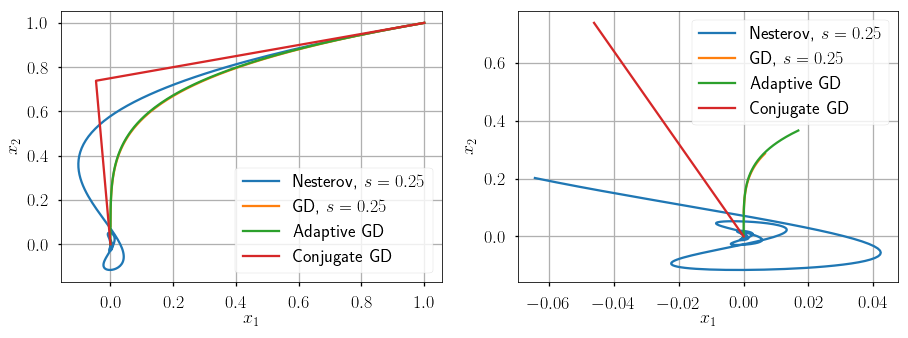

In [7]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
ax.plot([x[0] for x in hist_acc], [x[1] for x in hist_acc], label="Nesterov, $s = {}$".format(s))
ax.plot([x[0] for x in hist_gd], [x[1] for x in hist_gd], label="GD, $s = {}$".format(s))
ax.plot([x[0] for x in hist_adapt_gd], [x[1] for x in hist_adapt_gd], label="Adaptive GD")
ax.plot([x[0] for x in hist_cg], [x[1] for x in hist_cg], label="Conjugate GD")
ax.grid("on")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.legend(fontsize=18)
ax.tick_params(labelsize=18)

ax = fig.add_subplot(122)
acc_zoom_idx = 60
gd_zoom_idx = 500
gd_adapt_idx = 100
ax.plot([x[0] for x in hist_acc[acc_zoom_idx:]], [x[1] for x in hist_acc[acc_zoom_idx:]], label="Nesterov, $s = {}$".format(s))
ax.plot([x[0] for x in hist_gd[gd_zoom_idx:]], [x[1] for x in hist_gd[gd_zoom_idx:]], label="GD, $s = {}$".format(s))
ax.plot([x[0] for x in hist_adapt_gd[gd_adapt_idx:]], [x[1] for x in hist_adapt_gd[gd_adapt_idx:]], label="Adaptive GD")
ax.plot([x[0] for x in hist_cg[1:]], [x[1] for x in hist_cg[1:]], label="Conjugate GD")
ax.grid("on")
ax.set_xlabel("$x_1$", fontsize=fontsize)
ax.set_ylabel("$x_2$", fontsize=fontsize)
ax.legend(fontsize=fontsize)
ax.tick_params(labelsize=fontsize)

In [8]:
def plot_f(f, methods):
    plt.figure(figsize=figsize)
    for m in methods:
        f_hist = np.array([f(x) for x in m["hist"]])
        plt.semilogy(f_hist, label=m["label"])
    plt.legend(fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel("Number of iteration, $k$", fontsize=fontsize)
    plt.ylabel("Objective function, $f(x_k)$", fontsize=fontsize)

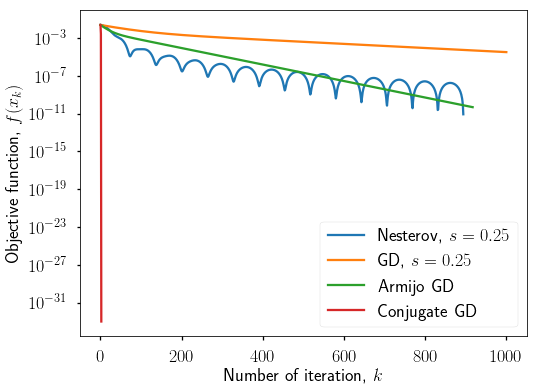

In [9]:
plot_f(f, methods)

### В чём идея ускорения в методе Нестерова по сравнению с градиентным спуском?

- Градиентный спуск - шаг длины $s$ вдоль траектории
- Метод Нестерова - шаг длины <span style="color:red">$\sqrt{s}$</span> вдоль траектории
- Для малых $s$ метод Нестерова движется быстрее!

**Однако!** На графике видно, как с приближением к точке минимума метод Нестерова начинает осциллировать.

### Как выбирать шаг для повышения устойчивости?

- Дискретизация ОДУ
$$
\frac{x(t + \Delta t) - 2x(t) + x(t - \Delta t)}{\Delta t^2} + \frac{3}{t} \frac{x(t) - x(t - \Delta t)}{\Delta t} + f'(X(t)) = 0
$$
или
$$
x(t + \Delta t) = \left(2 - \frac{3}{t} \Delta t\right) x(t) - x(t - \Delta t) \left(1 - \frac{3}{t} \Delta t\right) - f'(x(t))\Delta t^2 
$$
- Характеристическое уравнение TODO
- Критерий устойчивости TODO
- Следствие TODO

**Упражнение** Проведите аналогичный анализ для ОДУ, соответствующего градиентному спуску

### Магическая константа $3$

- $\frac{k-1}{k+2} = 1 - \frac{3}{k} + O\left(\frac{1}{k^2}\right)$
- Заменим $3$ на некоторое число $r$:
$$
\ddot{x} + \frac{r}{t}\dot{x} + f'(x) = 0, \quad x(0) = x_0 \quad \dot{x}(0) = 0
$$

- Пусть $r > 3$
    - **Теорема** Решение ОДУ удовлетворяет следующему неравенству
    $$
    f(x(t)) - f^* \leq \frac{(r-1)^2 \| x^* - x_0 \|}{2t^2}
    $$
    - Аналог метода Нестерова
    $$
    \begin{align*}
    & x_k = y_{k-1} - sf'(y_{k-1})\\
    & y_k = x_k + \frac{k-1}{k+ r - 1}(x_k - x_{k-1})
    \end{align*}
    $$
    - **Теорема** Последовательность $\{x_k\}$, полученная из вышеприведённого метода, при $s \leq \frac{1}{L}$ удовлетворяет следующему выражению:
    $$
    f(x_k) - f^* \leq \frac{(r-1)^2 \| x^* - x_0 \|^2}{2s (k+ r - 2)^2}
    $$
    
    

- Пусть $r < 3$
    - тогда доказательство предыдущей теоремы не работает
    - существуют контрпримеры, для которых обратно квадратичный порядок уменьшения значения целевой функции нарушается!
    - однако с дополнительными ограничениями на выпуклость
    $$
    (f - f^*)^{\frac{r-1}{2}}
    $$
    оптимальный порядок снова присутствует!

## Реальная задача: логистическая регрессия

In [10]:
import sklearn.datasets as skldata

C = 1
X, y = skldata.load_svmlight_file("german.numer")
print(X.shape, y.shape)


import scipy.special as scspec

def logloss(w, X, y, C):
    return np.linalg.norm(w)**2 / 2 +  C * np.mean(np.logaddexp(np.zeros(X.shape[0]), -y * X.dot(w)))

f = lambda w: logloss(w, X, y, C)

def logloss_grad(w, X, y, C):
    denom = scspec.expit(-y * X.dot(w))
    return w - C * X.T.dot(y * denom) / X.shape[0]

grad_f = lambda w: logloss_grad(w, X, y, C)

(1000, 24) (1000,)


In [11]:
import scipy.optimize as scopt
scopt.check_grad(f, grad_f, np.random.rand(X.shape[1]))

1.9234080364666097e-06

In [12]:
s = 1e-3
num_iter = 1000
total_hist_acc = {}
total_hist_gd = {}
total_hist_adapt_gd = {}
total_hist_cg_pl = {}
total_hist_cg_fr = {}
methods = []

datasets = ["./german.numer", "./ionospherescale.txt", 
                         "./sonarscale.txt", "./svmguide3.txt"]
for dataset_filename in datasets:
    print("=====================================")
    print("Summary of the results for dataset from file {}".format(dataset_filename))
    X, y = skldata.load_svmlight_file(dataset_filename)
    print("Shape of the design matrix = {}".format(X.shape))
    x0 = np.random.randn(X.shape[1])
    
    print("Nesterov accelerated method...")
    gd_acc = solvers.AcceleratedGD(f, grad_f, ss.ConstantStepSize(s))
    x_acc = gd_acc.solve(x0, max_iter=num_iter, disp=True)
    total_hist_acc[dataset_filename] = gd_acc.get_convergence()
    
    print("Gradient descent with constant size...")
    gd = solvers.GradientDescent(f, grad_f, ss.ConstantStepSize(s))
    x_gd = gd.solve(x0, max_iter=num_iter, disp=True)
    total_hist_gd[dataset_filename] = gd.get_convergence()
    
    
    print("Gradient descent with Armijo rule...")
    gd = solvers.GradientDescent(f, grad_f, ss.Backtracking("Armijo", beta=0.1, rho=0.7, init_alpha=1.))
    x_adapt_gd = gd.solve(x0, max_iter=num_iter, disp=True)
    total_hist_adapt_gd[dataset_filename] = gd.get_convergence()
    
    print("Polak-Rebiere conjugate gradient...")
    hist_cg_pl = []
    res_cg_pl = scopt.minimize(f, x0.copy(), method="CG", jac=grad_f, 
                               tol=1e-6, options={"maxiter": num_iter}, callback=lambda x: hist_cg_pl.append(x))
    print(res_cg_pl.message)
    total_hist_cg_pl[dataset_filename] = hist_cg_pl
    
    print("Fletcher-Reeves conjugte gradient...")
    
    cg_fr = solvers.ConjugateGradientFR(f, grad_f, ss.Backtracking("Armijo", beta=0.1, rho=0.7, init_alpha=1.))
    x_cg_fr = cg_fr.solve(x0, max_iter=num_iter, disp=True)
    total_hist_cg_fr[dataset_filename] = cg_fr.get_convergence()

    print("Nesterov (s = {}): f* = {}, accuracy = {}".format(s, f(x_acc), np.mean(y == np.sign(X.dot(x_acc)))))
    print("GD (s = {}): f* = {}, accuracy = {}".format(s, f(x_gd), np.mean(y == np.sign(X.dot(x_gd)))))
    print("Adaptive GD: f* = {}, accuracy = {}".format(f(x_adapt_gd), np.mean(y == np.sign(X.dot(x_adapt_gd)))))
    print("Polak-Rebiere CGD: f* = {}, accuracy = {}".format(f(res_cg_pl.x), np.mean(y == np.sign(X.dot(res_cg_pl.x)))))
    print("Fletcher-Rieves CGD: f* = {}, accuracy = {}".format(f(x_cg_fr), np.mean(y == np.sign(X.dot(x_cg_fr)))))
    print("=====================================")

methods.append({"label": "Nesterov, $s = {}$".format(s), "hist": total_hist_acc})
methods.append({"label": "GD, $s = {}$".format(s), "hist": total_hist_gd})
methods.append({"label": "Armijo GD", "hist": total_hist_adapt_gd})
methods.append({"label": "Polak-Rebiere CGD", "hist": total_hist_cg_pl})
methods.append({"label": "Fletcher-Rieves CGD", "hist": total_hist_cg_fr})

Summary of the results for dataset from file ./german.numer
Shape of the design matrix = (1000, 24)
Nesterov accelerated method...
Convergence in 1000 iterations
Norm of gradient = 0.013717496029157176
Function value = 0.5599612367953894
Gradient descent with constant size...
Convergence in 1000 iterations
Norm of gradient = 1.9235576341359883
Function value = 2.2879207932172863
Gradient descent with Armijo rule...
Convergence in 1000 iterations
Norm of gradient = 0.26004577133379214
Function value = 0.5680150030192807
Polak-Rebiere conjugate gradient...
Optimization terminated successfully.
Fletcher-Reeves conjugte gradient...
Convergence in 347 iterations
Norm of gradient = 9.275247926927251e-07
Function value = 0.5598889978717915
Nesterov (s = 0.001): f* = 0.5599612367953894, accuracy = 0.727
GD (s = 0.001): f* = 2.2879207932172863, accuracy = 0.734
Adaptive GD: f* = 0.5680150030192807, accuracy = 0.728
Polak-Rebiere CGD: f* = 0.559888997871986, accuracy = 0.725
Fletcher-Rieves CGD:

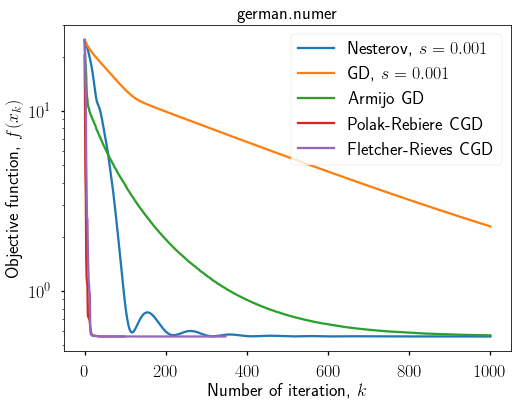

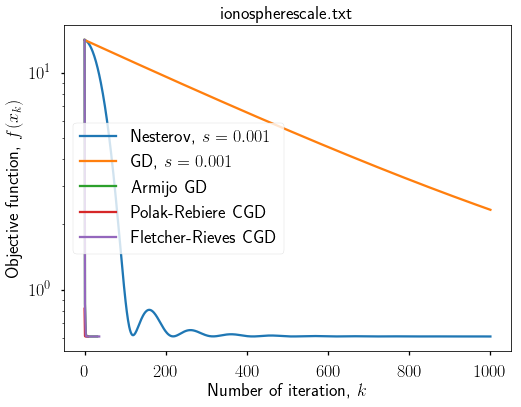

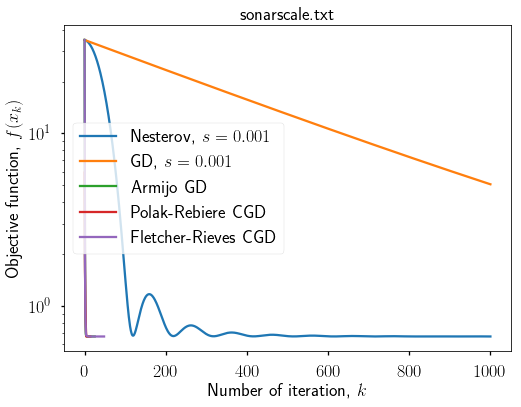

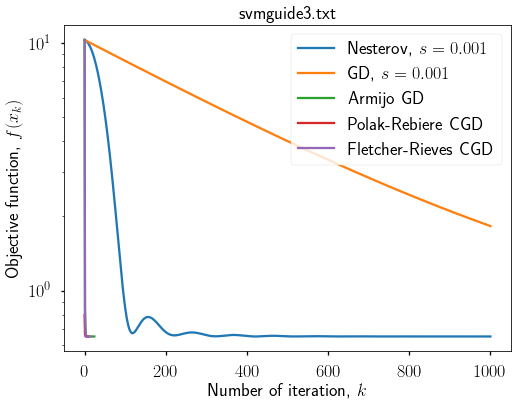

In [13]:
for dataset_filename in datasets:
    X, y = skldata.load_svmlight_file(dataset_filename)
    f = lambda w: logloss(w, X, y, C)
    method_hist = [{"label": m["label"], "hist": m["hist"][dataset_filename]} for m in methods]
    plot_f(f, method_hist)
    plt.title(dataset_filename.split("/")[-1], fontsize=fontsize)
    plt.show()

In [14]:
def plot_grad_norm(grad, methods):
    plt.figure(figsize=figsize)
    for m in methods:
        current_hist = [np.linalg.norm(grad(x)) for x in m["hist"]]
        plt.semilogy(current_hist, label=m["label"])
    plt.legend(fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.grid("on")
    plt.xlabel("Number of iteration, k", fontsize=fontsize)
    plt.ylabel("Gradient norm, $\|f'(x_k)\|_2$", fontsize=fontsize)

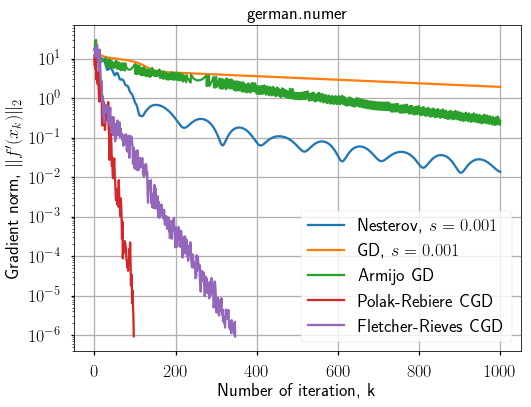

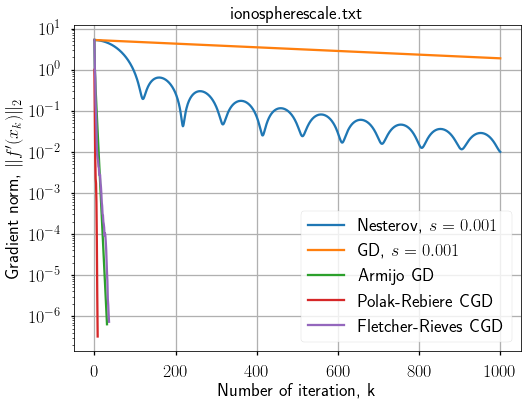

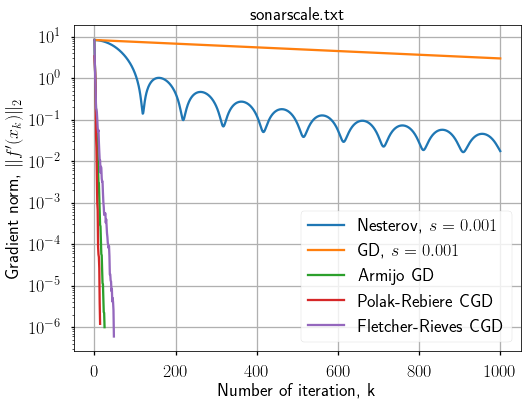

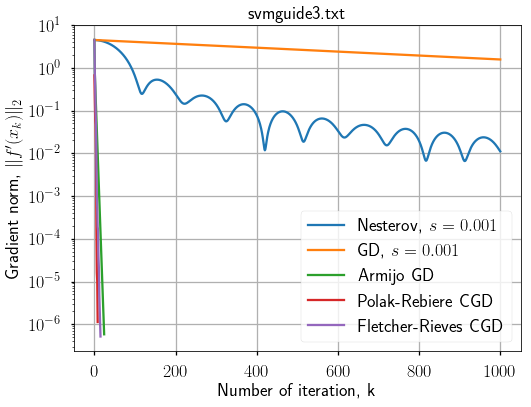

In [15]:
for dataset_filename in datasets:
    X, y = skldata.load_svmlight_file(dataset_filename)
    grad_f = lambda w: logloss_grad(w, X, y, C)
    method_hist = [{"label": m["label"], "hist": m["hist"][dataset_filename]} for m in methods]
    plot_grad_norm(grad_f, method_hist)
    plt.title(dataset_filename.split("/")[-1], fontsize=fontsize)
    plt.show()

## Худший случай

In [16]:
import scipy.sparse as scsp
import scipy.sparse.linalg as scsplin

In [17]:
beta = 1e6

def hard_f(x, beta=beta):
    n = x.shape[0]
    b = np.zeros(n)
    b[0] = 2
    maindiag =2 * np.ones(n)
    subdiag = -1 * np.ones(n)
    A = scsp.spdiags([subdiag, maindiag, subdiag], [-1, 0, 1], n, n)
    return 0.5 * beta * (x.dot(A.dot(x)) - b.dot(x) + 1) + 0.5 * x.dot(x)

def hard_f_grad(x, beta=beta):
    n = x.shape[0]
    b = np.zeros(n)
    b[0] = 2
    maindiag =2 * np.ones(n)
    subdiag = -1 * np.ones(n)
    A = scsp.spdiags([subdiag, maindiag, subdiag], [-1, 0, 1], n, n)
    return x + beta * A.dot(x) - 0.5 * beta * b

In [18]:
n = 200
s = 1e-7
max_iter = 1000
x0 = np.random.randn(n)
# x0 = np.zeros(n)
methods = []
acc_gd = solvers.AcceleratedGD(hard_f, hard_f_grad, ss.ConstantStepSize(s))
x_acc = acc_gd.solve(x0, max_iter=max_iter, disp=True)
hist_acc = acc_gd.get_convergence()

methods.append({"label": "Nesterov, $s = {}$".format(s), "hist": hist_acc})

gd = solvers.GradientDescent(hard_f, hard_f_grad, ss.ConstantStepSize(s))
x_gd = gd.solve(x0, max_iter=max_iter, disp=True)
hist_gd = gd.get_convergence()
methods.append({"label": "GD, $s = {}$".format(s), "hist": hist_gd})

gd_bt = solvers.GradientDescent(hard_f, hard_f_grad, ss.Backtracking("Armijo", rho=0.7, beta=0.1, init_alpha=1.))
x_adapt_gd = gd_bt.solve(x0, max_iter=max_iter, disp=True)
hist_adapt_gd = gd_bt.get_convergence()

methods.append({"label": "Backtracking GD", "hist": hist_adapt_gd})

hist_cg_pl = []
res_cg_pl = scopt.minimize(hard_f, x0.copy(), method="CG", jac=hard_f_grad, 
                           tol=1e-6, options={"maxiter": 1000}, callback=lambda x: hist_cg_pl.append(x))
print(res_cg_pl.message)
methods.append({"label": "Polak-Rebiere CGD", "hist": hist_cg_pl})

cg_fr = solvers.ConjugateGradientFR(hard_f, hard_f_grad, ss.Backtracking("Armijo", rho=0.7, beta=0.1, init_alpha=1.))
x_cg_fr = cg_fr.solve(x0, max_iter=max_iter, disp=True)
hist_cg_fr = cg_fr.get_convergence()

methods.append({"label": "Fletcher-Rieves CGD", "hist": hist_cg_fr})

print("Nesterov (s = {}): f* = {}".format(s, hard_f(x_acc)))
print("GD (s = {}): f* = {}".format(s, hard_f(x_gd)))
print("Adaptive GD: f* = {}".format(hard_f(x_adapt_gd)))
print("Polak-Rebiere CGD: f* = {}".format(hard_f(res_cg_pl.x)))
print("Fletcher-Rieves CGD: f* = {}".format(hard_f(x_cg_fr)))

Convergence in 1000 iterations
Norm of gradient = 252.32373454269367
Function value = 2603.0509221392044
Convergence in 1000 iterations
Norm of gradient = 13420.42253992903
Function value = 21689.376274611484
Convergence in 1000 iterations
Norm of gradient = 6394.009473469046
Function value = 8136.159812937346
Maximum number of iterations has been exceeded.
Convergence in 1000 iterations
Norm of gradient = 2921.959506792588
Function value = 2841.425632153968
Nesterov (s = 1e-07): f* = 2603.0509221392044
GD (s = 1e-07): f* = 21689.376274611484
Adaptive GD: f* = 8136.159812937346
Polak-Rebiere CGD: f* = 2520.727399681219
Fletcher-Rieves CGD: f* = 2841.425632153968


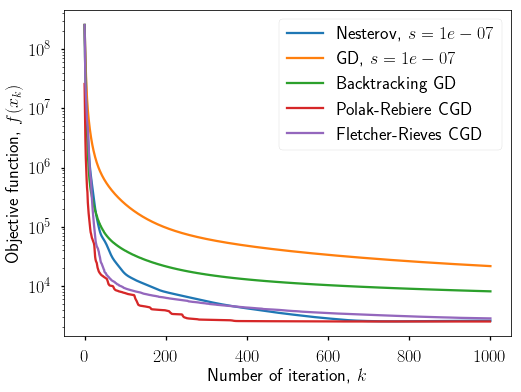

In [19]:
plot_f(hard_f, methods)

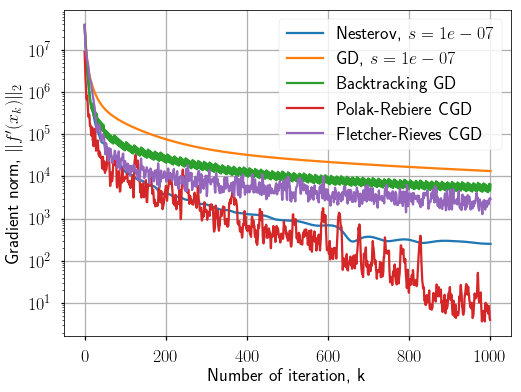

In [20]:
plot_grad_norm(hard_f_grad, methods)

In [21]:
b = np.zeros(n)
b[0] = 2
maindiag =2 * np.ones(n)
subdiag = -1 * np.ones(n)
A = scsp.spdiags([subdiag, maindiag, subdiag], [-1, 0, 1], n, n)
x_true = scsplin.spsolve(scsp.eye(n) + beta * A, 0.5 * beta * b)

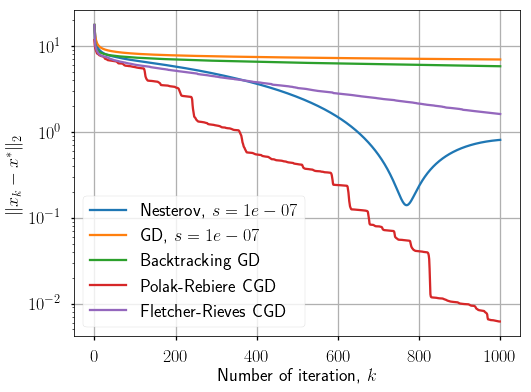

In [22]:
plt.figure(figsize=figsize)
for m in methods:
    plt.semilogy([np.linalg.norm(x - x_true) for x in m["hist"]], label=m["label"])
plt.legend(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.grid("on")
plt.xlabel("Number of iteration, $k$", fontsize=fontsize)
_ = plt.ylabel("$\|x_k - x^*\|_2$", fontsize=fontsize)

## Адаптивный выбор шага в методе Нестерова

## Заключение

- Методы первого порядка имеют интерпретацию на языке дифференциальных уравнений
- Шаг в итерационном методе моет быть выбран по критерию устойчивости соответствующей разностной схемы
- На практике теоретически лучшие методы могут проиграть методам, теоретические оценки которых ещё не доказаны